In [3]:
# Import Julia packages
using DrWatson
@quickactivate
using Revise
using LinearAlgebra
using DelimitedFiles
using SparseArrays
using StaticArrays
using BlockArrays
using CairoMakie
using UnPack
using FromFile
using GeometryBasics
using Random
using Colors
using JLD2
using LaTeXStrings
using Glob
using Printf
using Statistics
using ColorSchemes


@from "$(projectdir())/src/VertexModelContainers.jl" using VertexModelContainers
@from "$(projectdir())/src/Laplacians.jl" using Laplacians
@from "$(projectdir())/src/AnalysisFunctions.jl" using AnalysisFunctions
@from "$(projectdir())/src/CellProperties.jl" using CellProperties

In [58]:
folders=Glob.glob("test_large/*L₀=1*","C:\\Users\\v35431nc\\Documents\\VM_code\\VertexModel\\data\\sims" )[1:4]
saveDir="C:\\Users\\v35431nc\\Documents\\VM_code\\VertexModel\\data\\sims\\test_large/"

"C:\\Users\\v35431nc\\Documents\\VM_code\\VertexModel\\data\\sims\\test_large/"

In [32]:
folders

5-element Vector{String}:
 "C:\\Users\\v35431nc\\Documents\\VM_" ⋯ 85 bytes ⋯ "ld=0.05_γ=0.2_24-01-05-22-28-18"
 "C:\\Users\\v35431nc\\Documents\\VM_" ⋯ 85 bytes ⋯ "ld=0.05_γ=0.2_24-01-09-12-50-47"
 "C:\\Users\\v35431nc\\Documents\\VM_" ⋯ 85 bytes ⋯ "ld=0.05_γ=0.2_24-01-09-20-02-00"
 "C:\\Users\\v35431nc\\Documents\\VM_" ⋯ 85 bytes ⋯ "ld=0.05_γ=0.2_24-01-09-20-08-05"
 "C:\\Users\\v35431nc\\Documents\\VM_" ⋯ 85 bytes ⋯ "ld=0.05_γ=0.2_24-01-09-20-11-34"

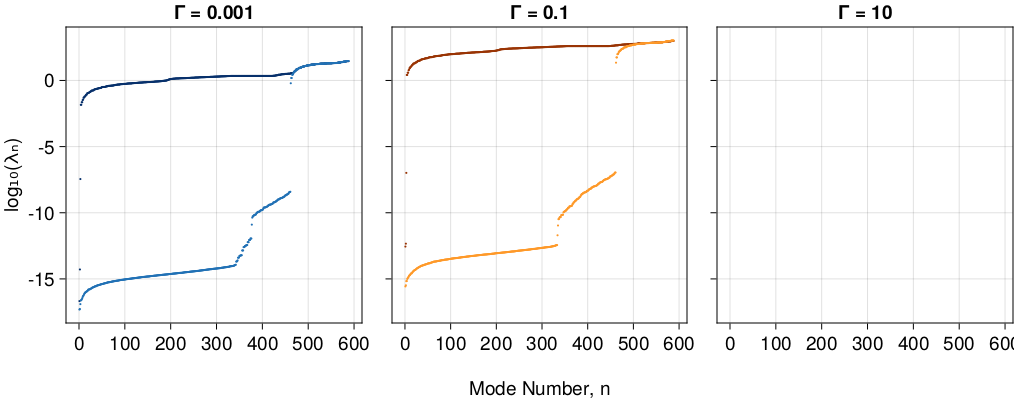

┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605


CairoMakie.Screen{IMAGE}


In [59]:
set_theme!(figure_padding=1, backgroundcolor=(:white,1.0), font="Helvetica", fontsize=19)
fig = Figure(resolution=(1500,400))

a1=Axis(fig[1,1], ylabel="log₁₀(λₙ)",title="Γ = 0.001")
a2=Axis(fig[1,2],yticklabelsvisible=false, title="Γ = 0.1")
a3=Axis(fig[1,3],yticklabelsvisible=false, title="Γ = 10")


linkyaxes!(a1,a2,a3)
linkxaxes!(a1,a2,a3)


axes=[a1,a2,a3]
cmaps=[ColorSchemes.Blues_9,ColorSchemes.YlOrBr_5, ColorSchemes.Reds_9]
m=1
for i=1:2:length(folders)
    evH=readdlm(datadir(folders[i], "eigenmodes","HE_eigenvalues.csv"))[:,1]
    evLv=readdlm(datadir(folders[i], "eigenmodes","LvE_eigenvalues.csv"))[:,1]
    @unpack R, matrices, params = load(datadir(folders[i],"frameData/systemDataFinal.jld2"))
    @unpack nCells,nVerts, γ, L₀ = params
    n=LinRange(1, length(evH), length(evH))
    scatter!(axes[m],n, log10.(sort(abs.(evH))),color=cmaps[m][end],markersize=3,label="Γ = "*string(γ))
    scatter!(axes[m],n, log10.(sort(abs.(evLv))),color=cmaps[m][end-2],markersize=3,label="Γ = "*string(γ))
    m+=1
end
#Label(fig[2,1,Bottom()],"λ_"*string(2*nVerts-2*nCells+n)*" = "*@sprintf("%.5E", evalH[2*nVerts-2*nCells+n]),fontsize = 32)

# #hidedecorations!(ax22)
# #hidespines!(ax22)

colsize!(fig.layout,1,Aspect(1,1.0))
colsize!(fig.layout,2,Aspect(1,1.0))
colsize!(fig.layout,3,Aspect(1,1.0))


xlabel = Label(fig[2, 1:3], "Mode Number, n", rotation = 0)

# Colorbar(fig[1,2],limits=colorrange=Aevlims,colormap=:bwr,flipaxis=true)
# Colorbar(fig[2,2],limits=colorrange=Levlims,colormap=:bwr,flipaxis=true)


# Label(fig[1,1,Left()],string(L"Area"),fontsize = 32, rotation=π/2)
# Label(fig[2,1,Left()],string(L"Perimeter"),fontsize = 32, rotation)
# #Label( fig[0,:],"Γ = "*string(params.γ)*", L₀ = "*string(params.L₀)*", δL = "*string(params.δL),fontsize = 32, color = (:black, 1))
resize_to_layout!(fig)
# #save(datadir(f,"eigenmodes","eigenmodes_alpha$(@sprintf("%03d", 2*nVerts-2*nCells+n)).png"),fig)

display(fig)

┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605


┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605


┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605


┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605


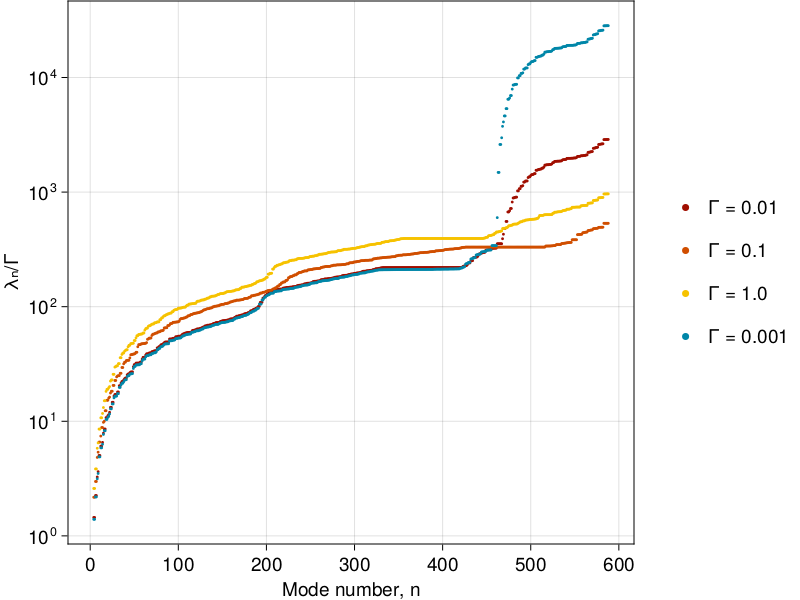

In [60]:
Γ=[]
fig = Figure()
set_theme!(figure_padding=5, backgroundcolor=(:white,1.0), font="Helvetica", fontsize=19)
ax=Axis(fig[1, 1], xlabel="Mode number, n", ylabel="λₙ/Γ", title=" ", yscale=log10)
m=1
for f in folders
    evH=readdlm(datadir(f, "eigenmodes","HE_eigenvalues.csv"))[:,1]
    @unpack R, matrices, params = load(datadir(f,"frameData/systemDataFinal.jld2"))
    @unpack nCells,nVerts, γ, L₀ = params
    n=LinRange(1, length(evH), length(evH))
    scatter!(ax,n[4:end], (sort(abs.(evH)))[4:end]./γ,color=ColorSchemes.Johnson[m],markersize=4, label="Γ = "*string(γ))
    append!(Γ,γ)
    #vlines!(ax,2*nVerts+1-((2*nCells)-1), color=:red)
   m+=1
end
#ylims!((10^(-4)), 10^4)

#fig[1, 2] = Legend(fig, ax, framevisible = false)
# elem_1 = [MarkerElement(color = Makie.wong_colors()[1], marker = :circle, markersize = 10)]

# elem_2 = [MarkerElement(color = Makie.wong_colors()[2], marker = :circle, markersize = 10)]

elem=[MarkerElement(color = ColorSchemes.Johnson[x], marker = :circle, markersize = 10) for x in 1:4]
Legend(fig[1, 2],
    elem,
    ["Γ = "*string(Γ[x]) for x in 1:4],
    patchsize = (35, 35), rowgap = 8, framevisible=false)
resize_to_layout!(fig)

save(datadir(saveDir,"compare_spectra_H_scale_gamma_non_zero.png"),fig)

fig

In [15]:

nv=LinRange(1, 2*nVerts, 2*nVerts)
nc=LinRange(2*nVerts-2*nCells+1, 2*nVerts, 2*nCells)
nD=LinRange(2*nVerts-2*nCells, 2*nVerts, 2*nCells-1)
fig = Figure()
ax=Axis(fig[1, 1], xlabel="n", ylabel="log₁₀λₙ", title="Γ = "*string(params.γ)*", L₀ = "*string(params.L₀))

scatter!(ax,nv, (((sH))), color=:black,markersize=4, label="σ²ₙ, N")
scatter!(ax,nv, (((reverse(sDD)))), color=:blue,markersize=4, label="λₙ, E⁻¹MᵀGM+E⁻¹gX")
scatter!(ax,nv, (((evalDD))), color=:red,markersize=4, label="λₙ, D+diag(σ²ₙ)")#
scatter!(ax,nv, ((evalH)), color=:orange,markersize=4, label="λₙᴰ + σ²ₙ")#
#scatter!(ax,nv, reverse(sLv), color=:green,markersize=4, label="λₙᴰ")
scatter!(ax,nv, evalLv, color=:pink,markersize=4, label="λₙ, D+diag(σ²ₙ)")#


vlines!(ax,2*nVerts+1/2-((2*nCells)), color=:red)


#vlines!(ax,2*nVerts+1/2-((nCells)), color=:red)
fig[1, 2] = Legend(fig, ax, framevisible = false)
#save(datadir(f,"eigenmodes","compare_eigenvalues_E_Γ_"*string(params.γ)*"_L0_"*string(params.L₀)*".png"),fig)
fig

UndefVarError: UndefVarError: `nVerts` not defined

┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.

┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.

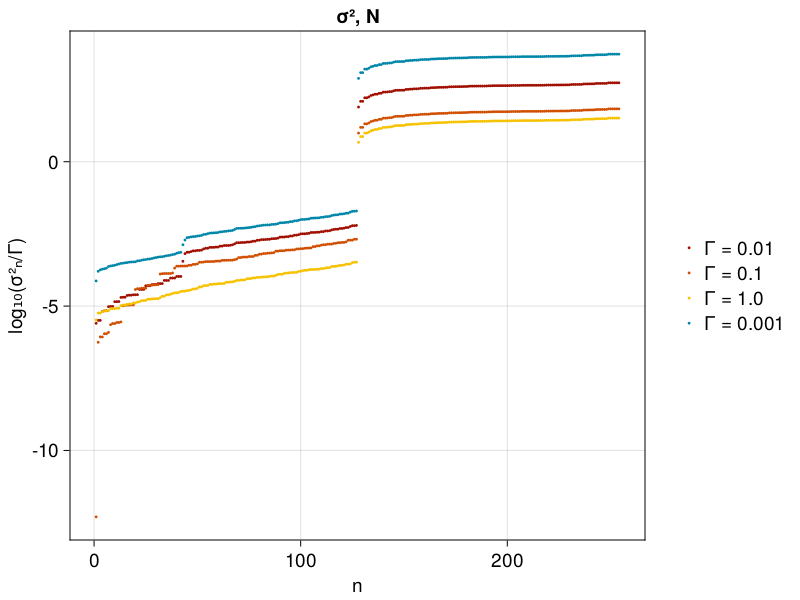

In [70]:

fig = Figure()
ax=Axis(fig[1, 1], xlabel="n", ylabel="log₁₀(λₙ)", title="Eigenvalues E⁻¹MᵀGM + E⁻¹gX")
m=1
for f in folders
    evH=readdlm(datadir(f, "eigenmodes","HE_eigenvalues.csv"))[:,1]
    @unpack R, matrices, params = load(datadir(f,"frameData/systemDataFinal.jld2"))
    @unpack nCells,nVerts, γ, L₀ = params
    n=LinRange(1, length(evH), length(evH))
    scatter!(ax,n, log10.(sort(abs.(evH))),color=ColorSchemes.Johnson[m],markersize=4, label="Γ = "*string(γ))

    #vlines!(ax,2*nVerts+1-((2*nCells)-1), color=:red)
   m+=1
end

#fig[1, 2] = Legend(fig, ax, framevisible = false)

elem=[MarkerElement(color = ColorSchemes.Johnson[x], marker = :circle, markersize = 10) for x in 1:4]
Legend(fig[1, 2],
    elem,
    ["Γ = "*string(Γ[x]) for x in 1:4],
    patchsize = (35, 35), rowgap = 8, framevisible=false)
resize_to_layout!(fig)
# elem_1 = [MarkerElement(color = Makie.wong_colors()[1], marker = :circle, markersize = 10)]

# elem_2 = [MarkerElement(color = Makie.wong_colors()[2], marker = :circle, markersize = 10)]
# Legend(fig[1, 2],
#     [elem_1, elem_2],
#     ["no peripheral vertices", "peripheral vertices"],
#     patchsize = (35, 35), rowgap = 10)


save(datadir(saveDir,"compare_spectra_vary_gamma.png"),fig)

fig


fig = Figure()
ax=Axis(fig[1, 1], xlabel="n", ylabel="log₁₀(σ²ₙ/Γ)", title="σ², N")
m=1
for f in folders
    sigma_N=readdlm(datadir(f, "eigenmodes","svd_N_sigma.csv"))[:,1]
    @unpack R, matrices, params = load(datadir(f,"frameData/systemDataFinal.jld2"))
    @unpack nCells,nVerts, γ, L₀ = params
    n=LinRange(1, length(sigma_N), length(sigma_N))
    scatter!(ax,n, log10.(sort(abs.(sigma_N)./γ )),color=ColorSchemes.Johnson[m],markersize=4, label="Γ = "*string(γ))

    #vlines!(ax,2*nVerts+1-((2*nCells)-1), color=:red)
   m+=1
end

fig[1, 2] = Legend(fig, ax, framevisible = false)
# elem_1 = [MarkerElement(color = Makie.wong_colors()[1], marker = :circle, markersize = 10)]

# elem_2 = [MarkerElement(color = Makie.wong_colors()[2], marker = :circle, markersize = 10)]
# Legend(fig[1, 2],
#     [elem_1, elem_2],
#     ["no peripheral vertices", "peripheral vertices"],
#     patchsize = (35, 35), rowgap = 10)


save(datadir(saveDir,"compare_spectra_svd_N_scale_gamma.png"),fig)

fig



In [91]:
folders

5-element Vector{String}:
 "C:\\Users\\v35431nc\\Documents\\VM_" ⋯ 90 bytes ⋯ "=0.05_γ=0.001_23-11-19-19-20-22"
 "C:\\Users\\v35431nc\\Documents\\VM_" ⋯ 89 bytes ⋯ "d=0.05_γ=0.01_23-11-19-19-07-20"
 "C:\\Users\\v35431nc\\Documents\\VM_" ⋯ 88 bytes ⋯ "ld=0.05_γ=0.1_23-11-19-18-42-53"
 "C:\\Users\\v35431nc\\Documents\\VM_" ⋯ 88 bytes ⋯ "ld=0.05_γ=1.0_23-11-19-16-35-55"
 "C:\\Users\\v35431nc\\Documents\\VM_" ⋯ 91 bytes ⋯ "d=0.05_γ=10.0_23-11-19-19-51-33"

In [51]:
fig = Figure()
ax=Axis(fig[1, 1], xlabel="number of sides", ylabel="count", title="Cell Edge Count")
for f in folders
    @unpack R, matrices, params = load(datadir(f,"frameData/systemDataFinal.jld2"))
    @unpack nCells,nVerts, γ, L₀= params
    @unpack  cellEdgeCount=matrices
    #evecLc=readdlm(datadir(f, "eigenmodes","LcE_eigenvectors.csv"), ',')


    n=LinRange(1, 2*nCells, 2*nCells)


    scatterlines!(ax,sort(unique(cellEdgeCount)),[count(==(element),cellEdgeCount) for element in sort(unique(cellEdgeCount)) ],markersize=10, linewidth=1,label="Γ = "*string(γ))



end
    
fig[1, 2] = Legend(fig, ax, framevisible = false)
save(datadir(saveDir,"cell_edge_count.png"),fig)

fig


ArgumentError: ArgumentError: No file exists at given path: C:\Users\v35431nc\Documents\VM_code\VertexModel\data\sims\test_large\N_cells\L₀=0.75_realTimetMax=4.32e6_t1Threshold=0.05_γ=0.2_24-01-05-22-28-18\frameData/systemDataFinal.jld2

┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605


┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605


┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605


┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605


┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605


┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605


┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605


┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605


┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605


┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605


┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605


┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605


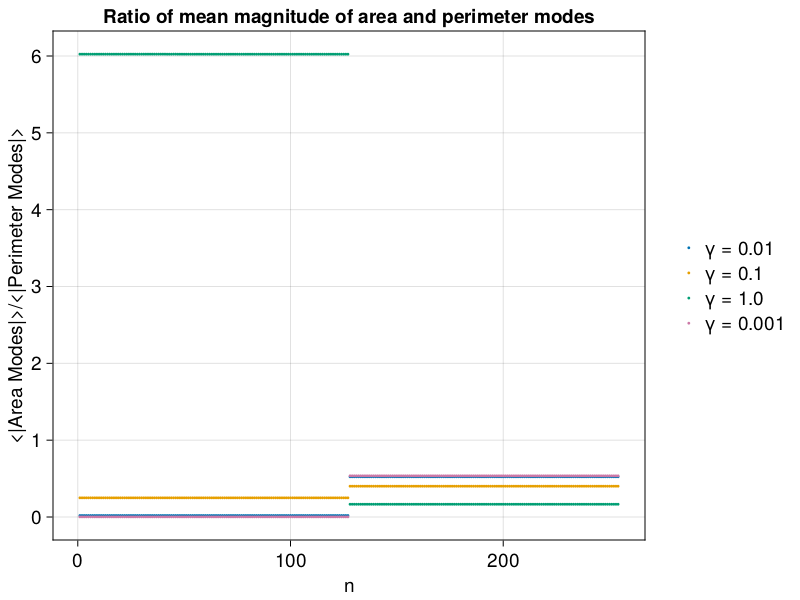

In [63]:
for f in folders
    @unpack R, matrices, params = load(datadir(f,"frameData/systemDataFinal.jld2"))
    @unpack nCells,nVerts, γ, L₀ = params
    evecLc=readdlm(datadir(f, "eigenmodes","LcE_eigenvectors.csv"), ',')
    A_vec=evecLc[1:nCells, :]
    L_vec=evecLc[nCells+1:end, :]

    A_means=mean(abs.(A_vec), dims=1)
    L_means=mean(abs.(L_vec), dims=1)

    fig = Figure()
    ax=Axis(fig[1, 1], xlabel="n", ylabel="mean magnitude", title="Mean magnitude of area and perimeter modes")
    n=LinRange(1, 2*nCells, 2*nCells)


        scatter!(ax,n,A_means[1,:] ,markersize=4, label="<|Area Modes|>")
        scatter!(ax,n,L_means[1,:] ,markersize=4, label="<|Perimeter Modes|>")
        #scatter!(ax,n,A_means[1,:]./L_means[1,:] ,markersize=4, label="ratio_mag")

        #vlines!(ax,2*nVerts+1-((2*nCells)-1), color=:red)



    fig[1, 2] = Legend(fig, ax, framevisible = false)
    save(datadir(f,"eigenmodes","mean_Area_Perimeter_modes.png"),fig)

    fig
end
        
for f in folders
    @unpack R, matrices, params = load(datadir(f,"frameData/systemDataFinal.jld2"))
    @unpack nCells,nVerts, γ, L₀ = params
    evecLc=readdlm(datadir(f, "eigenmodes","LcE_eigenvectors.csv"), ',')
    n=LinRange(1, 2*nCells, 2*nCells)

    A_vec=evecLc[1:nCells, :]
    L_vec=evecLc[nCells+1:end, :]

    A_means=mean(abs.(A_vec), dims=1)
    L_means=mean(abs.(L_vec), dims=1)

    fig = Figure()
    ax=Axis(fig[1, 1], xlabel="n", ylabel="mean magnitude", title="Mean magnitude of area and perimeter modes")
    n=LinRange(1, 2*nCells, 2*nCells)


        scatter!(ax,n,A_means[1,:] ,markersize=4, label="<|Area Modes|>")
        scatter!(ax,n,L_means[1,:] ,markersize=4, label="<|Perimeter Modes|>")
        #scatter!(ax,n,A_means[1,:]./L_means[1,:] ,markersize=4, label="ratio_mag")

        #vlines!(ax,2*nVerts+1-((2*nCells)-1), color=:red)



    fig[1, 2] = Legend(fig, ax, framevisible = false)
    save(datadir(f,"eigenmodes","mean_Area_Perimeter_modes.png"),fig)


end

#nCells=100

    fig = Figure()
    ax=Axis(fig[1, 1], xlabel="n", ylabel="<|Area Modes|>/<|Perimeter Modes|>", title="Ratio of mean magnitude of area and perimeter modes")
    n=LinRange(1, 2*nCells, 2*nCells)

for f in folders
    @unpack R, matrices, params = load(datadir(f,"frameData/systemDataFinal.jld2"))
    @unpack nCells,nVerts, γ, L₀ = params
    n=LinRange(1, 2*nCells, 2*nCells)

    evecLc=readdlm(datadir(f, "eigenmodes","LcE_eigenvectors.csv"), ',')
    A_vec=evecLc[1:nCells, :]
    L_vec=evecLc[nCells+1:end, :]

    A_means=mean(abs.(A_vec), dims=1)
    L_means=mean(abs.(L_vec), dims=1)

    scatter!(ax,n,A_means[1,:]./L_means[1,:] ,markersize=4, label="γ = "*string(γ))

        #vlines!(ax,2*nVerts+1-((2*nCells)-1), color=:red)

end


    fig[1, 2] = Legend(fig, ax, framevisible = false)
    save(datadir(saveDir,"mean_ratio_mag_Area_Perimeter_modes.png"),fig)

    fig


┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605


┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605


┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605


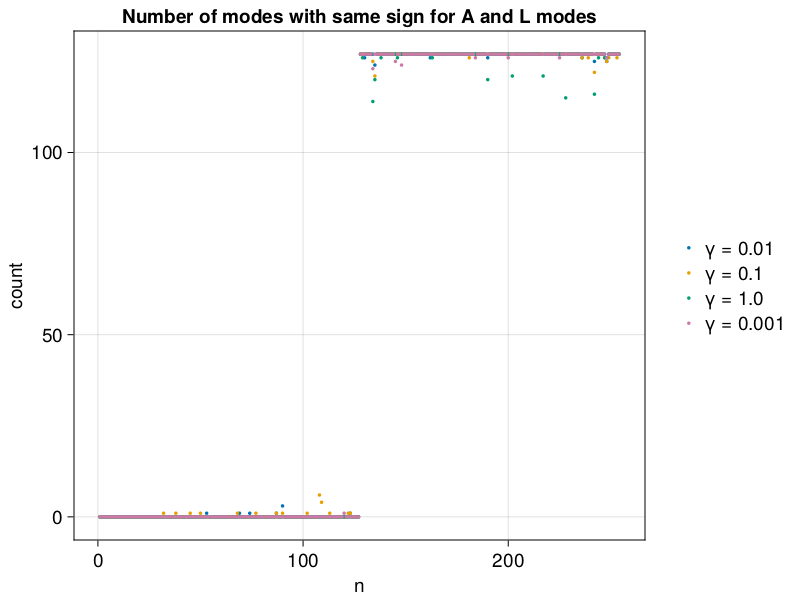

In [65]:

fig = Figure()
ax=Axis(fig[1, 1], xlabel="n", ylabel="count", title="Number of modes with same sign for A and L modes")

for f in folders
@unpack R, matrices, params = load(datadir(f,"frameData/systemDataFinal.jld2"))
@unpack nCells,nVerts, γ, L₀ = params
evecLc=readdlm(datadir(f, "eigenmodes","LcE_eigenvectors.csv"), ',')
n=LinRange(1, 2*nCells, 2*nCells)

A_vec=evecLc[1:nCells, :]
L_vec=evecLc[nCells+1:end, :]
modeSign=zeros(2*nCells)
    for n=1:2*nCells
        a=A_vec[:,n].*L_vec[:,n]
        modeSign[n]=length(a[a.>0])

    end

scatter!(ax,n,modeSign ,markersize=5, label="γ = "*string(γ))

    #vlines!(ax,2*nVerts+1-((2*nCells)-1), color=:red)

end


fig[1, 2] = Legend(fig, ax, framevisible = false)
save(datadir(saveDir,"mode_sign.png"),fig)

fig




┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605


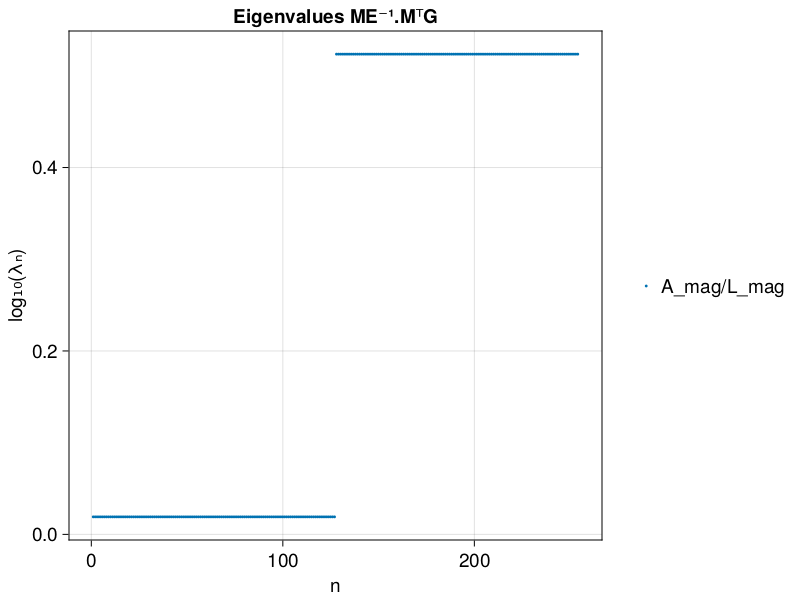

In [66]:
@unpack R, matrices, params = load(datadir(folders[1],"frameData/systemDataFinal.jld2"))
@unpack nCells,nVerts, γ, L₀ = params
test=readdlm(datadir(folders[1], "eigenmodes","LcE_eigenvectors.csv"), ',')

A_vec=test[1:nCells, :]
L_vec=test[nCells+1:end, :]
A_means=mean(abs.(A_vec), dims=1)
L_means=mean(abs.(L_vec), dims=1)


fig = Figure()
ax=Axis(fig[1, 1], xlabel="n", ylabel="log₁₀(λₙ)", title="Eigenvalues ME⁻¹.MᵀG")
n=LinRange(1, 2*nCells, 2*nCells)


    #scatter!(ax,n,A_means[1,:] ,markersize=4, label="Area_mag")
    #scatter!(ax,n,L_means[1,:] ,markersize=4, label="Perimeter_mag")
    scatter!(ax,n,A_means[1,:]./L_means[1,:] ,markersize=4, label="A_mag/L_mag")

    #vlines!(ax,2*nVerts+1-((2*nCells)-1), color=:red)



fig[1, 2] = Legend(fig, ax, framevisible = false)
#save(datadir(saveDir,"compare_spectra_LcE.png"),fig)

fig

┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.

┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605


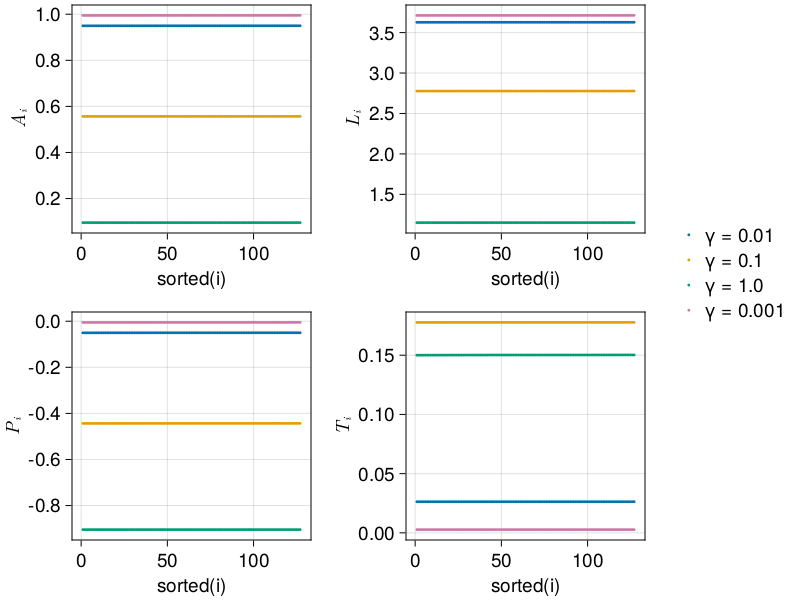

In [67]:
fig = Figure()
ax1=Axis(fig[1, 1], xlabel="sorted(i)", ylabel=string(L"A_i"))

ax2=Axis(fig[1, 2], xlabel="sorted(i)", ylabel=string(L"L_i"))

ax3=Axis(fig[2, 1], xlabel="sorted(i)", ylabel=string(L"P_i"))

ax4=Axis(fig[2, 2], xlabel="sorted(i)", ylabel=string(L"T_i"))
#ax5=Axis(fig[3, 1], xlabel="sorted(i)", ylabel=string(L"P_{\mathrm{eff},i}"))

#ax6=Axis(fig[3, 2], xlabel="sorted(i)", ylabel=string(L"\sigma_{\mathrm{shear}}"))
n=LinRange(1, nCells, nCells)
m=1
for f in folders
    @unpack R, matrices, params = load(datadir(f,"frameData/systemDataFinal.jld2"))
    @unpack nCells,nVerts, γ, L₀ = params
    @unpack cellAreas,cellPerimeters, cellTensions, cellPressures = matrices


    A_means=mean(cellAreas)
    L_means=mean(cellPerimeters)
    shapeParameter=cellPerimeters./sqrt.(cellAreas)
    Peff=getPeff(params, matrices)
    cellQ, cellJ=makeCellQandJ(params, matrices)
    cellShearStress=getShearStress(params, matrices, cellJ)


    scatter!(ax1,n,sort(cellAreas) ,markersize=4, label="γ = "*string(γ))
    scatter!(ax2,n,sort(cellPerimeters) ,markersize=4, label="γ = "*string(γ))
    scatter!(ax3,n,sort(cellPressures) ,markersize=4, label="γ = "*string(γ))
    scatter!(ax4,n,sort(-cellTensions) ,markersize=4, label="γ = "*string(γ))
    #scatter!(ax5,n,sort(Peff) ,markersize=4, label="γ = "*string(γ))
    #scatter!(ax6,n,sort(cellShearStress) ,markersize=4, label="γ = "*string(γ))


        #vlines!(ax,2*nVerts+1-((2*nCells)-1), color=:red)
    m+=1
end


fig[:, 3] = Legend(fig, ax4,framevisible = false)
# elem_1 = [MarkerElement(color = Makie.wong_colors()[1], marker = :circle, markersize = 10)]

# elem_2 = [MarkerElement(color = Makie.wong_colors()[2], marker = :circle, markersize = 10)]
# Legend(fig[:, 3],
#     [elem_1, elem_2],
#     ["no peripheral vertices", "peripheral vertices"],
#     patchsize = (35, 35), rowgap = 10)
save(datadir(saveDir,"cell_quantities.png"),fig)

fig

┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605


┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605


┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.MatricesContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.VertexModelContainers.ParametersContainer does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\v35431nc\.julia\packages\JLD2\cHcDY\src\data\reconstructing_datatypes.jl:605
┌ Warning: type VertexModel...\VertexModelContainers.jl.

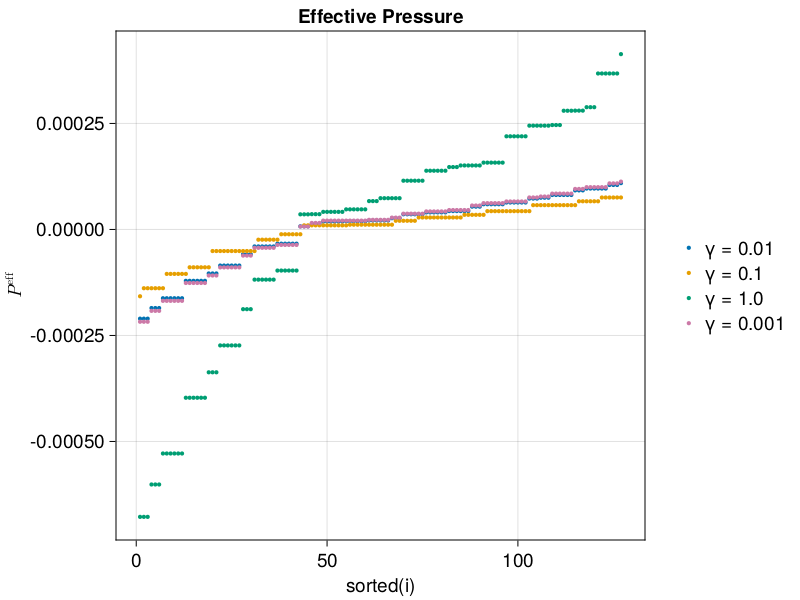

In [68]:
fig = Figure()
ax=Axis(fig[1, 1], xlabel="sorted(i)", ylabel=string(L"\sigma^{\mathrm{shear}}_i"), title="Shear Stress")


n=LinRange(1, nCells, nCells)
m=1
for f in folders
    @unpack R, matrices, params = load(datadir(f,"frameData/systemDataFinal.jld2"))
    @unpack nCells,nVerts, γ, L₀ = params
    @unpack cellAreas,cellPerimeters, cellTensions, cellPressures = matrices


    A_means=mean(cellAreas)
    L_means=mean(cellPerimeters)
    shapeParameter=cellPerimeters./sqrt.(cellAreas)
    Peff=getPeff(params, matrices)
    cellQ, cellJ=makeCellQandJ(params, matrices)
    cellShearStress=getShearStress(params, matrices, cellJ)


    #scatter!(ax,n,sort(cellAreas) ,markersize=4, label="γ = "*string(γ))
    #scatter!(ax,n,sort(cellPerimeters) ,markersize=4, label="γ = "*string(γ))
    #scatter!(ax,n,sort(cellPressures) ,markersize=4, label="γ = "*string(γ))
    #scatter!(ax,n,sort(-cellTensions) ,markersize=4, label="γ = "*string(γ))
    #scatter!(ax,n,sort(Peff) ,markersize=6, label="γ = "*string(γ))
    scatter!(ax,n,sort(cellShearStress) ,markersize=6, label="γ = "*string(γ))


        #vlines!(ax,2*nVerts+1-((2*nCells)-1), color=:red)
    m+=1
end


fig[:, 2] = Legend(fig, ax,framevisible = false)

# elem_1 = [MarkerElement(color = Makie.wong_colors()[1], marker = :circle, markersize = 10)]

# elem_2 = [MarkerElement(color = Makie.wong_colors()[2], marker = :circle, markersize = 10)]
# Legend(fig[1, 2],
#     [elem_1, elem_2],
#     ["no peripheral vertices", "peripheral vertices"],
#     patchsize = (35, 35), rowgap = 10)

#Legend(fig[1,2], [elem_1, elem_2], ["peripheral vertices", "no peripheral vertices"], framevisible = false)
save(datadir(saveDir,"shearstress.png"),fig)

fig

fig = Figure()
ax=Axis(fig[1, 1], xlabel="sorted(i)", ylabel=string(L"P^{\mathrm{eff}}"), title="Effective Pressure")


for f in folders
    @unpack R, matrices, params = load(datadir(f,"frameData/systemDataFinal.jld2"))
    @unpack nCells,nVerts, γ, L₀ = params
    @unpack cellAreas,cellPerimeters, cellTensions, cellPressures = matrices


    A_means=mean(cellAreas)
    L_means=mean(cellPerimeters)
    shapeParameter=cellPerimeters./sqrt.(cellAreas)
    Peff=getPeff(params, matrices)
    cellQ, cellJ=makeCellQandJ(params, matrices)
    cellShearStress=getShearStress(params, matrices, cellJ)


    #scatter!(ax,n,sort(cellAreas) ,markersize=4, label="γ = "*string(γ))
    #scatter!(ax,n,sort(cellPerimeters) ,markersize=4, label="γ = "*string(γ))
    #scatter!(ax,n,sort(cellPressures) ,markersize=4, label="γ = "*string(γ))
    #scatter!(ax,n,sort(-cellTensions) ,markersize=4, label="γ = "*string(γ))
    scatter!(ax,n,sort(Peff) ,markersize=6, label="γ = "*string(γ))
    #scatter!(ax,n,sort(cellShearStress) ,markersize=6, label="γ = "*string(γ))


        #vlines!(ax,2*nVerts+1-((2*nCells)-1), color=:red)
    m+=1
end

fig[:, 2] = Legend(fig, ax,framevisible = false)

#elem_1 = [MarkerElement(color = Makie.wong_colors()[1], marker = :circle, markersize = 10)]

#elem_2 = [MarkerElement(color = Makie.wong_colors()[2], marker = :circle, markersize = 10)]
# Legend(fig[1, 2],
#     [elem_1, elem_2],
#     ["no peripheral vertices", "peripheral vertices"],
#     patchsize = (35, 35), rowgap = 10)

#Legend(fig[1,2], [elem_1, elem_2], ["peripheral vertices", "no peripheral vertices"], framevisible = false)
save(datadir(saveDir,"Peff.png"),fig)

fig

areamodes divide perimeter modes

plot shape parameter plot area and perimeter /A_0 or L_0

plot average mag f each area and perimeter mode


across sims, plot spectra, H, Lv, Lc

plot average area and perimeter and shape param.